# Unsupervised learning

This lecture covers the following topics
1. Dimensionality reduction
  1. Principal Component Analysis (**PCA**): PCA is important and fundamental. It will be covered and needs to be understood very well.
  1. *Independent Component Analysis (**ICA**)*: Will be just shortly mentioned for curiosity
  1. Manifold learning, Multi-Dimensional Scaling (**MDS**) and Locally Linear Embedding (LLE):* will be introduced shortly, but not studied in detail.
  1. t-distributed Stochastic Neighbor Embedding (**t-SNE**), introduced, but we do not go into details
1. Clustering
  1. **k-Means** and explanation of Expectation Maximization (**E-M**) algorithm.
  1. Gaussian mixture model, **GMM**
  1. Overview of other methods


Read more details from the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) by Jake VanderPlas published under Creative Commons [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode).

![Python Data Science Handbook](kuvat/PDSH-cover-small.png)

In supervised machine learning, the task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

In contrast, in unsupervised learning, the true values, $y_i$, are not known. In this case we cannot traine a model to predict anything, but instead try to expolore the X-matrix data itself. Unsupervised methods do predict something, but we do not know what it is before the function is targeted to the data.

$$
   ? = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$

Unsupervised methods are also often used for reducing the dimensions of the data by removing redundancy, and they work also in feature selection.

## Dimensionality reduction

The dimensionality of the design matrix, $X$, shown above is the number of features, $p$.

Dimensionality reductions means transforming data from a high dimensional representation to the lower dimensional representation, still retaining usefull properties of the original data. When dimensionality reduction is applied to matrix $X_{n\times p}$ the resulting reduced matrix will have as many samples as the original matrix, but the number of features $p$ is reduced.

### Principal Component Analysis (PCA)

PCA is one of the most well known dimensionality reduction methods. It transforms the set of observations with possibly correlated variables (=features) into a set of values of linearly uncorrelated variables, called principal components.

PCA transformation is defined in such a way that the first principal component has the largest possible variance and the rest of the components are ordered according to their variances in descending order.

PCA can be used as a dimensionality reduction method by removing some of the least important variables, and keeping the first most important.

This is very convenient, since the variables in high-dimensional problems are often correlated. The high dimensionality and co-variance between the features makes many statistical methods inapplicable. Eliminating the covariance and reducing the dimensionality makes many methods working better.

PCA was invented in 1901 by Karl Pearson, as an analogue of
the principal axis theorem in mechanics; it was later
independently developed (and named) by Harold Hotelling in
the 1930s.Depending on the field of application, it is also named thediscrete Karhunen Loeve transform (KLT) in signal processing,
the Hotelling transform in multivariate quality control, singular
value decomposition (SVD), and eigenvalue decomposition
(EVD).

Mathematically PCA projection works like this:
$$
    Y_{n\times p'} = X_{n\times p} ~ E_{p\times p'},
$$

where $n$ is number of samples, $p$ is number of variables (or features), $p'$ is possibly reduced number of features, $X$ is the design matrix, input to PCA, $E$ is matrix of eigenvectors, $Y$ is a matrix of principal components, projections. 

The most important component of $Y$ is the first column, and the rest of them carry less information in decreasing order. Dimensionality reduction is achieved by simply discarding the rightmost columns of $Y$. 

Original data can be reconstructed as follows:
$$
    X_{n\times p} = Y_{n\times p'} ~ E_{p'\times p},
$$

Eigenvalues and eigenvectors can be calculated for example using Singular Value Decomposition (SVD)
$$
   X = USV^T,
$$
where S is the diagonal matrix of singular values (eigenvalues) $s_i$ and columns of V are principal directions/axis (or eigenvectors).


See references [1-4](#references)

In [41]:
# Lets load the Iris dataset again

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')  
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [268]:
pd.Categorical(iris.species)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [271]:
# Convert text column to categories
iris['category']=pd.Categorical(iris.species)
iris.category.cat.codes


0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: int8

<AxesSubplot:xlabel='sepal_length', ylabel='petal_length'>

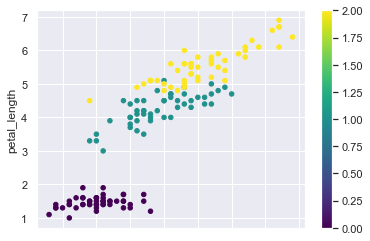

In [273]:
# To visualize the data, we have to plot it in 2D. Lets choose two variables
# which may be usefull. The category number is used as color index to the colormap
iris.plot.scatter(x='sepal_length', y='petal_length', 
                  c=iris.category.cat.codes, cmap='viridis')


Text(0, 0.5, 'Percentage of variance explained')

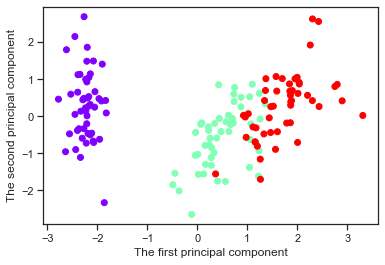

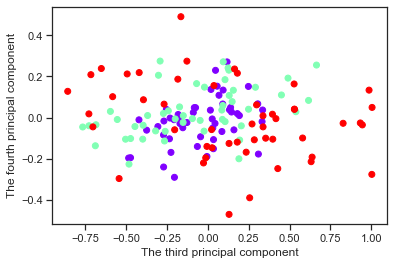

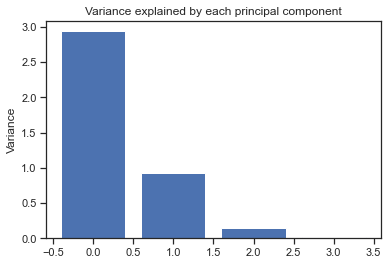

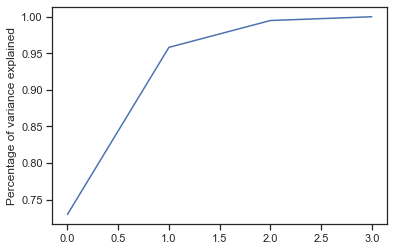

In [85]:
# Import Principal component analysis from Scikit Learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#I_scaled = scale(iris.iloc[:,:4])
I_scaled = iris.iloc[:,:4]

# Apply it to the Iris dataset
pca = PCA(4)
pca.fit(I_scaled)
Y=pca.transform(I_scaled)

#Y=pca.fit_transform(iris.iloc[:,:4])
plt.scatter(Y[:,0], Y[:,1], c=iris.category.cat.codes, cmap='rainbow')
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.figure()
plt.scatter(Y[:,2], Y[:,3], c=iris.category.cat.codes, cmap='rainbow')
plt.xlabel('The third principal component')
plt.ylabel('The fourth principal component')
plt.figure()
plt.bar(range(4), pca.explained_variance_)
plt.title('Variance explained by each principal component')
plt.ylabel('Variance')
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percentage of variance explained')
#Y.shape

The mean values are different, but are the differences significant. Perhaps studying the overall variation or noise by means of standard deviation would help.

## Handwriting recognition

The handwriting recognition dataset contains 1797 digitized hand written written characters. The characters are digitized using 8x8 grid, so each sample is represented by 32 parameters. Each parameter can have a value from 0 to 15.


In [318]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

(1797, 64)


Apply PCA dot the data, keeping all 32 dimensions for now, to study how much variance is explained by each principal component.

(1797, 64)
(1797, 32)


Text(0, 0.5, 'The variance explained / %')

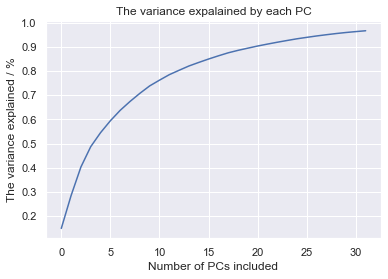

In [377]:
pca = PCA(32)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('The variance expalained by each PC')
plt.xlabel('Number of PCs included')
plt.ylabel('The variance explained / %')

In [378]:
# Take the first character data, and reshape it into 8x8 matrix
print(digits.data[0,:].reshape((8,8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


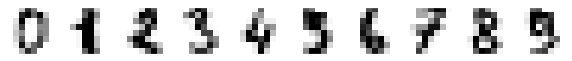

In [379]:
# Plot the first samples of each number

# First create a array of 10 subplots in one row
fig,axn=plt.subplots(nrows=1, ncols=10, figsize=(10,2))

# Select one example of each character and plot them in separate subplot
for i in range(10):
    # Select one subplot. axn can contain a two-dimensional array
    # of subplots. flatten() shrinks the structure 
    ax=axn.flatten()[i]
    
    # Plot the data as an 8x8 array, using grey colormap
    ax.imshow(digits.data[i,:].reshape((8,8)), cmap='Greys')
    
    # Disable the numbers in x- and y-axes by setting them as empty lists
    ax.set_xticks([])
    ax.set_yticks([])



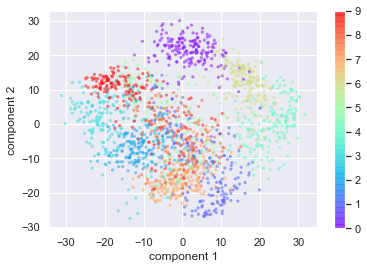

In [306]:
plt.scatter(projected[:, 0], projected[:, 1],
    c=digits.target, edgecolor='none', alpha=0.5,
    cmap='rainbow', s=10)
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar();

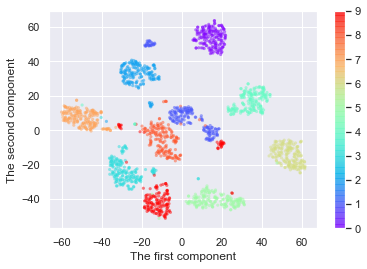

In [380]:
# TSNE produces more cohesive clusters than PCA, and works pretty fast
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
Y=tsne.fit_transform(digits.data)

plt.scatter(Y[:,0], Y[:,1],    
    c=digits.target, edgecolor='none', alpha=0.5,
    cmap='rainbow', s=10)
plt.xlabel('The first component')
plt.ylabel('The second component')
plt.colorbar();

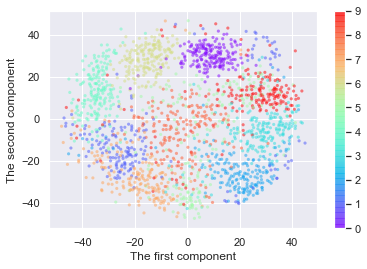

In [366]:
# MDS is here really slow, but finally produces pretty nice image
from sklearn.manifold import MDS
mds=MDS(n_components=2)
Y=mds.fit_transform(digits.data)

plt.scatter(Y[:,0], Y[:,1],    
    c=digits.target, edgecolor='none', alpha=0.5,
    cmap='rainbow', s=10)
plt.xlabel('The first component')
plt.ylabel('The second component')
plt.colorbar();

## World happiness / Speaker recognition

In [274]:
#https://www.kaggle.com/primaryobjects/voicegender?select=voice.csv
#D=pd.read_csv('data/voice.csv')
#D['category'] = pd.Categorical(D.label)
#D['catcode'] = D.category.cat.codes
#del(D['label'])

D=pd.read_csv('data/happiness_2019.csv')
print(D.shape)
D.describe()
D

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


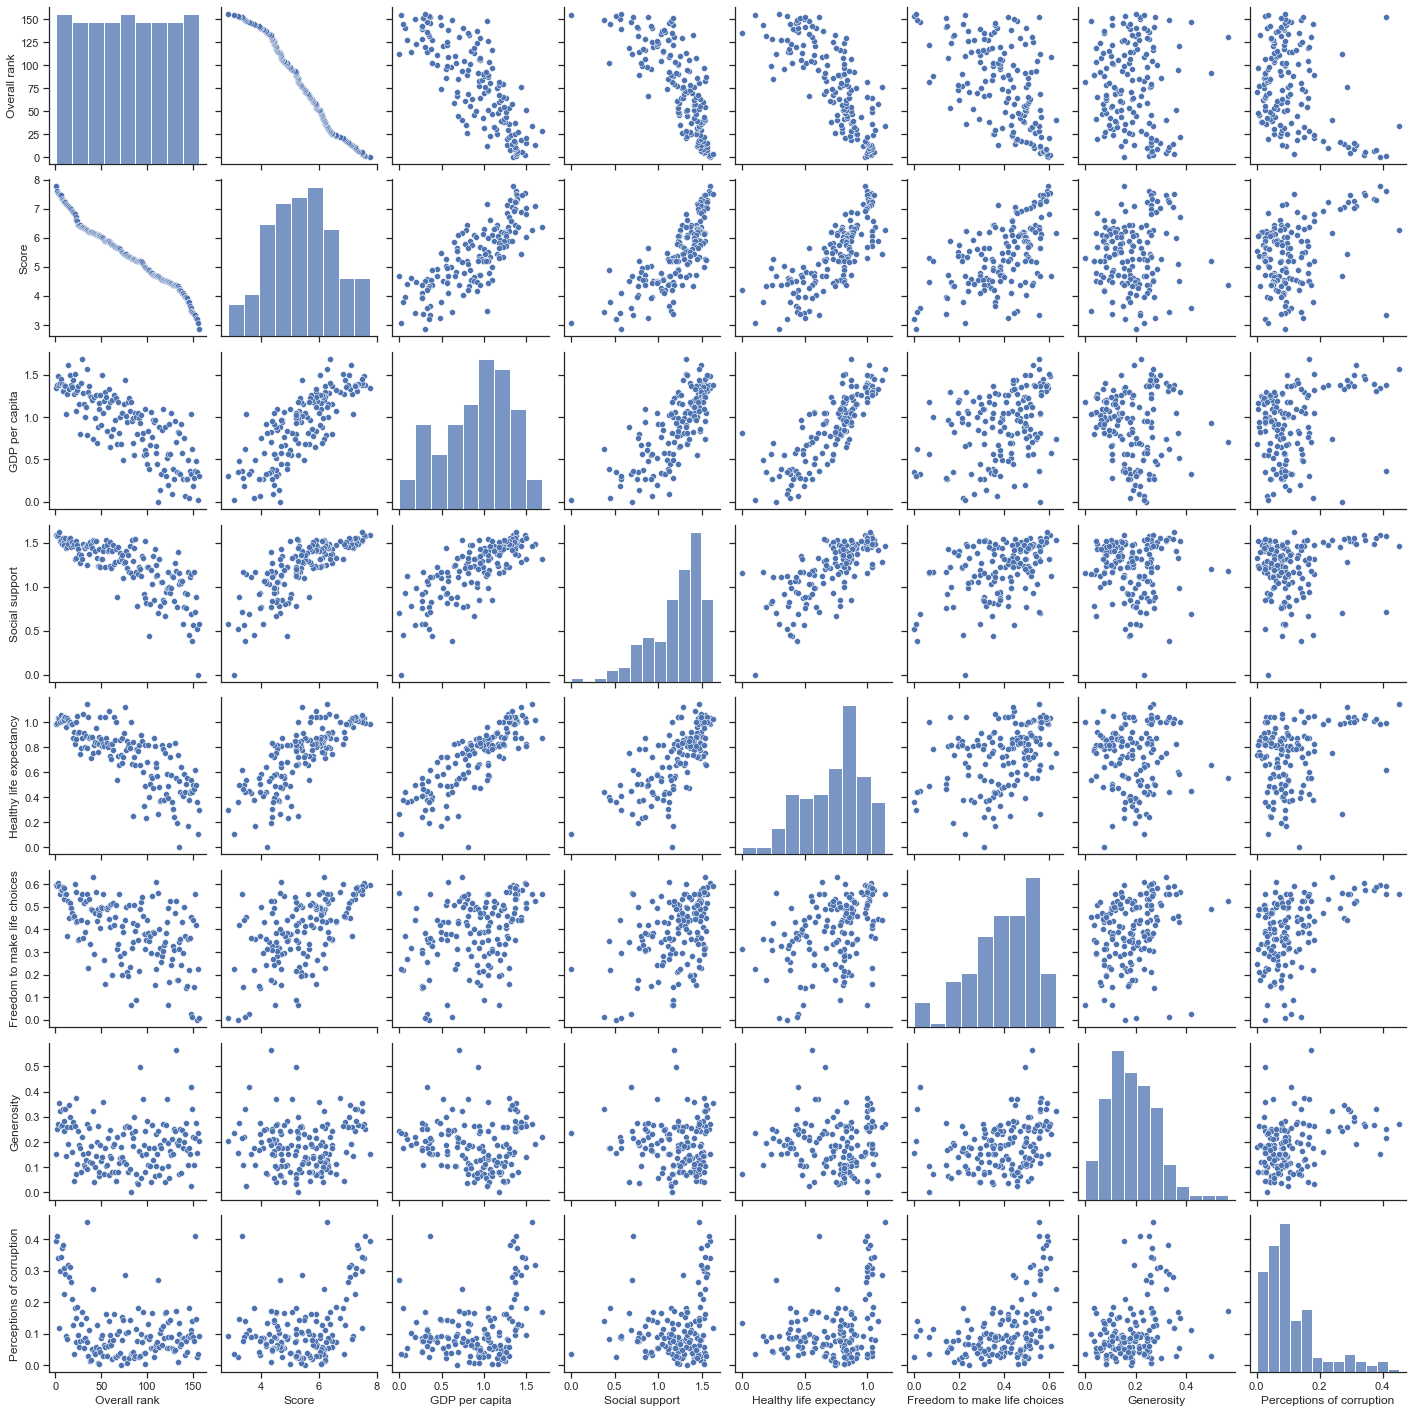

In [208]:
sns.pairplot(D)

In [281]:
from sklearn.preprocessing import scale
#D_scaled = scale(D.iloc[:,:20])
D_scaled = scale(D.iloc[:,3:])


(156, 6)

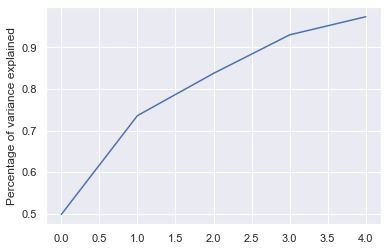

In [291]:
#pca=PCA(10)
pca=PCA(5)
#Y=pca.fit_transform(D.iloc[:,3:])
Y=pca.fit_transform(D_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylabel('Percentage of variance explained')


![image.png](kuvat/colormaps.png)

Text(0, 0.5, 'The second principal component')

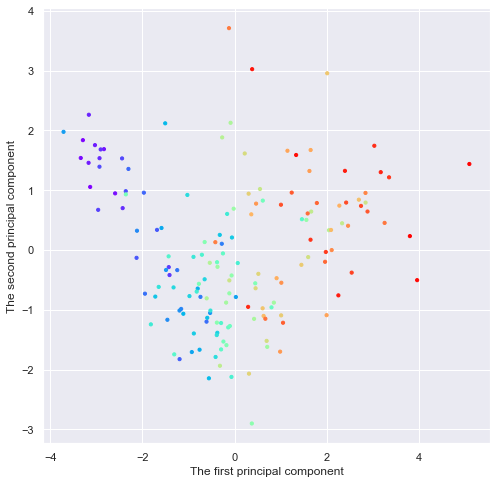

In [287]:
plt.figure(figsize=(8,8))
#plt.scatter(Y[:,0], Y[:,1], c=D.category.cat.codes, cmap='winter', s=1)
plt.scatter(Y[:,0], Y[:,1], c=D.iloc[:,0], cmap='rainbow', s=10)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
#D.category.head()

In [290]:
# Get the eigenvectors
pca.components_.shape

(5, 6)

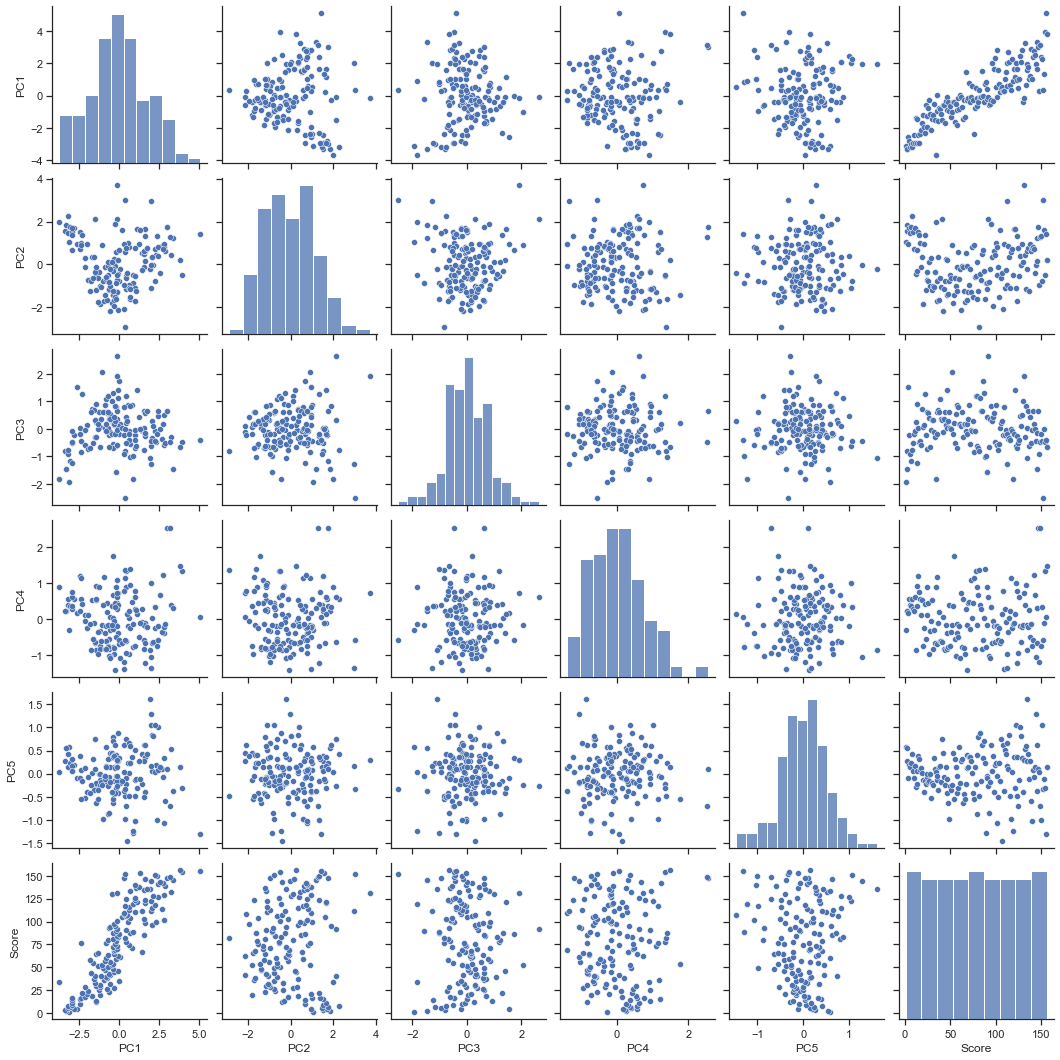

In [214]:
Ypd=pd.DataFrame(Y, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
Ypd['Score'] = D.iloc[:,0]
sns.pairplot(Ypd)

Index(['GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

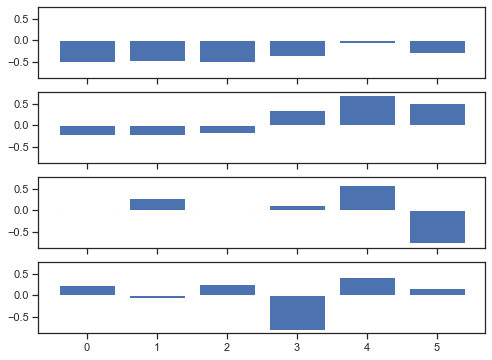

In [205]:
# Let's study how the principal components are constructed
# by plotting the eigenvectors
N=20
N=6
fig, (ax1,ax2,ax3,ax4)=plt.subplots(nrows=4, ncols=1, 
                                    sharex=True, 
                                    sharey=True, 
                                    figsize=(8,6))
ax1.bar(range(N),pca.components_[0,:])
ax2.bar(range(N),pca.components_[1,:])
ax3.bar(range(N),pca.components_[2,:])
ax4.bar(range(N),pca.components_[3,:])
ax4.set_xticks(range(N))
D.columns[3:]

## t-SNE


Text(0, 0.5, 'The second component')

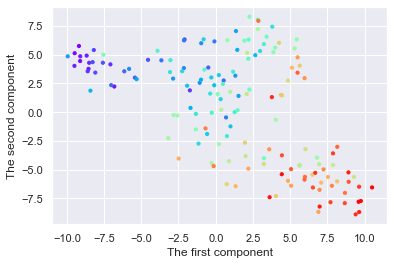

In [292]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
Y=tsne.fit_transform(D_scaled)

plt.scatter(Y[:,0], Y[:,1], c=D.iloc[:,0], cmap='rainbow', s=10)
plt.xlabel('The first component')
plt.ylabel('The second component')

## k-Means

k-Means is a simple clustering algorithms based on arithmetic distances and Expectation-Maximization (E-M) algorithm. It is simple and usefull in many cases, but it has limitations. 

The K-means algorithm aims to choose cluster centers (centroids) that minimise the inertia, or within-cluster sum-of-squares criterion presented by the following objective function, $J$:

$$
   J =\sum_{j=1}^{k} \sum_{i=1}^{n} || x_i - c_j ||,
$$

where, $x_i$ is a sample (case) and $c_j$ is the centroid, $k$ is the number of samples and $n$ is the number of clusters. $|| x_i - c_j ||$ is the arithmetic distance from a sample to the nearest centroid $c_j$. The sample $x_i$ is said to belong to cluster $j$ iff $c_j$ is the nearest cluster center.


Inertia can be recognized as a measure of how internally coherent clusters are. It suffers from various drawbacks:
- It is assumed that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a normalized metric: we just know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.


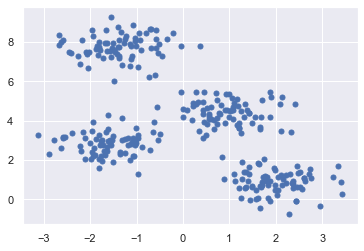

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

from sklearn.datasets import make_blobs
# Try with random_state=0 or 5
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=25);

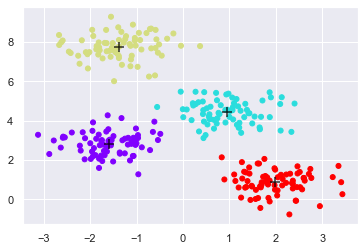

In [252]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=25, cmap='rainbow')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');


### The expectation Maximization algorithm

The expecation maximization algorithms is an iterative method for optimisation of the objective function. It consists of alternating expectation and maximization steps. 

The following code shows how the expectation and maximization steps iterate in finding optimal k-Means solution. In k-Means, the expectation is simply the evaluation of the objective function, to sum of distances from samples to the nearest cluster centers. The maximization step is made by moving the cluster center to better position to the center point of the current cluster content. The algorithms is initialized by given a number of cluster centers or at least number of clusters. Often the initial positions of cluster centers will be initialized randomly. The high densities of samples starts attracting the cluster centers, and at the same time, the competition of samples repels cluster centers farther away from each other. The algorithm may converge to different solutions if initialized differently.

In [254]:
# This code is from Python Data Science Handbook
# https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Expectation-Maximization

from sklearn.metrics import pairwise_distances_argmin
def draw_points(ax, c, factor=1):
    ax.scatter(X[:, 0], X[:, 1], c=c, cmap='viridis',
               s=50 * factor, alpha=0.3)
    
def draw_centers(ax, centers, factor=1, alpha=1.0):
    ax.scatter(centers[:, 0], centers[:, 1],
               c=np.arange(4), cmap='viridis', s=200 * factor,
               alpha=alpha)
    ax.scatter(centers[:, 0], centers[:, 1],
               c='black', s=50 * factor, alpha=alpha)https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html

def make_ax(fig, gs):
    ax = fig.add_subplot(gs)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    return ax



Text(0.98, 0.98, 'Final Clustering')

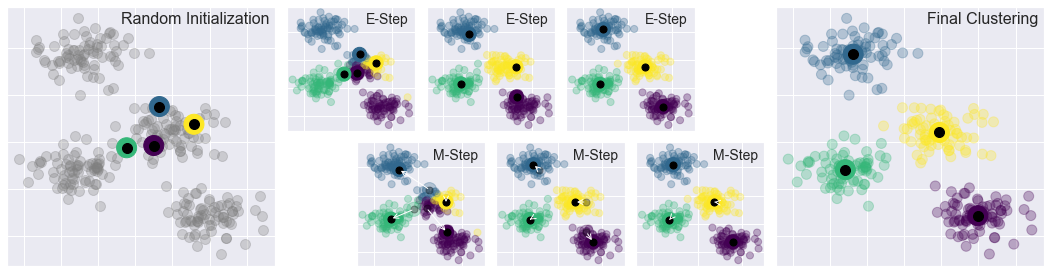

In [260]:
X, y_true = make_blobs(n_samples=300, centers=4,
                   cluster_std=0.60, random_state=0)

rng = np.random.RandomState(42)
centers = [0, 4] + rng.randn(4, 2)

fig = plt.figure(figsize=(15, 4))
gs = plt.GridSpec(4, 15, left=0.02, right=0.98, bottom=0.05, top=0.95, wspace=0.2, hspace=0.2)
ax0 = make_ax(fig, gs[:4, :4])
ax0.text(0.98, 0.98, "Random Initialization", transform=ax0.transAxes,
     ha='right', va='top', size=16)
draw_points(ax0, 'gray', factor=2)
draw_centers(ax0, centers, factor=2)

for i in range(3):
    ax1 = make_ax(fig, gs[:2, 4 + 2 * i:6 + 2 * i])
    ax2 = make_ax(fig, gs[2:, 5 + 2 * i:7 + 2 * i])
    
    # E-step
    y_pred = pairwise_distances_argmin(X, centers)
    draw_points(ax1, y_pred)
    draw_centers(ax1, centers)
    
    # M-step
    new_centers = np.array([X[y_pred == i].mean(0) for i in range(4)])
    draw_points(ax2, y_pred)
    draw_centers(ax2, centers, alpha=0.3)
    draw_centers(ax2, new_centers)
    for i in range(4):
        ax2.annotate('', new_centers[i], centers[i],
                     arrowprops=dict(arrowstyle='->', linewidth=1))
    
    # Finish iteration
    centers = new_centers
    ax1.text(0.95, 0.95, "E-Step", transform=ax1.transAxes, ha='right', va='top', size=14)
    ax2.text(0.95, 0.95, "M-Step", transform=ax2.transAxes, ha='right', va='top', size=14)


# Final E-step    
y_pred = pairwise_distances_argmin(X, centers)
axf = make_ax(fig, gs[:4, -4:])
draw_points(axf, y_pred, factor=2)
draw_centers(axf, centers, factor=2)
axf.text(0.98, 0.98, "Final Clustering", transform=axf.transAxes,
         ha='right', va='top', size=16)
.

### Application to digits recognition

Text(0.5, 0, 'First t-SNE component')

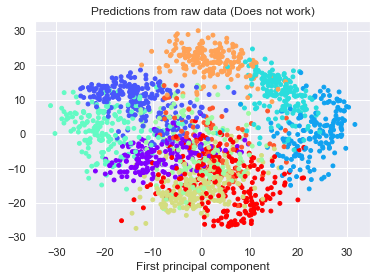

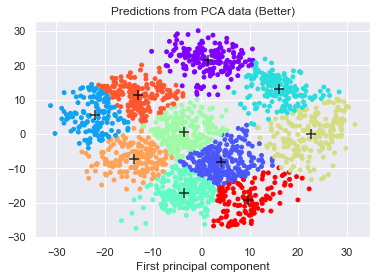

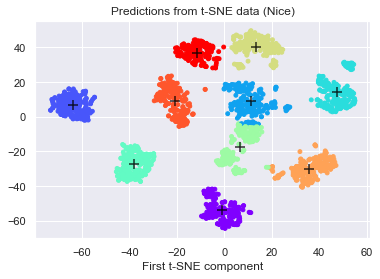

In [407]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load the data and instantiate the k-mean clustering for three cases 
digits = load_digits()
kmeans_raw = KMeans(n_clusters=10)
kmeans_pca = KMeans(n_clusters=10)
kmeans_tsne = KMeans(n_clusters=10)

# Instantiate the projection modules
pca = PCA(2)
tsne=TSNE(n_components=2)

# Make projections on the data
projected_pca = pca.fit_transform(digits.data)
projected_tsne=tsne.fit_transform(digits.data)

# Apply kMeans to three case
#  1) Directly to the input data
#  2) PCA projected data
#  3) tSNE projected data
kmeans_raw.fit(digits.data)
y_km_raw = kmeans_raw.predict(digits.data)

kmeans_pca.fit(projected_pca)
y_km_pca = kmeans_pca.predict(projected_pca)

kmeans_tsne.fit(projected_tsne)
y_km_tsne = kmeans_tsne.predict(projected_tsne)


# Plot them all
plt.figure()
projected=projected_pca
y_kmeans = kmeans_raw.predict(digits.data)
centers = kmeans_raw.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.title('Predictions from raw data (Does not work)')
plt.xlabel('First principal component')

plt.figure()
projected=projected_pca
y_kmeans = kmeans_pca.predict(projected_pca)
centers = kmeans_pca.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');
plt.title('Predictions from PCA data (Better)')
plt.xlabel('First principal component')

plt.figure()
projected=projected_tsne
y_kmeans = kmeans_tsne.predict(projected_tsne)
centers = kmeans_tsne.cluster_centers_
plt.scatter(projected[:, 0], projected[:, 1], c=y_kmeans, s=15, cmap='rainbow')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.8, marker='+');
plt.title('Predictions from t-SNE data (Nice)')
plt.xlabel('First t-SNE component')




In [406]:
kmeans_raw.cluster_centers_[:,2]

array([ 0.28742515,  9.98666667,  0.03296703, 10.18857143,  4.96135266,
        6.49797571,  4.22905028,  3.95022624,  8.69662921,  1.15934066])

In [401]:
#plt.scatter(digits.target, y_kmeans)
from sklearn.metrics import confusion_matrix
print("Raw data")
print(confusion_matrix(digits.target, kmeans_raw.predict(digits.data)))
print("PCA")
print(confusion_matrix(digits.target, kmeans_pca.predict(projected_pca)))
print("t-SNE")
print(confusion_matrix(digits.target, kmeans_tsne.predict(projected_tsne)))

Raw data
[[  1   0   0   0   0   0 177   0   0   0]
 [  0   1  55  24   0   0   0  99   1   2]
 [  0   0   2 148   3   2   1   8  13   0]
 [  0   2   0   0   7  12   0   7 155   0]
 [164   0   5   0  10   0   0   2   0   0]
 [  2 136   0   0   0  42   0   0   1   1]
 [  0   0   1   0   0   0   1   2   0 177]
 [  0   1   2   0 174   0   0   2   0   0]
 [  0   4   6   3   5  52   0 100   2   2]
 [  0   6  20   0   8 139   0   1   6   0]]
PCA
[[  0   0   0   1   1   4   0   0 157  15]
 [  9  50   0   2  29   6  86   0   0   0]
 [  9  13   3   0  35   4   0 113   0   0]
 [ 12   0  96   0  11  21   0  43   0   0]
 [  3   5   0 147   0   0   5   0   0  21]
 [ 26  47   1   2  46  46   0   3   6   5]
 [  0   2   0  23   0   0   0   0   8 148]
 [116  39   0   1   1   0  21   1   0   0]
 [ 25  61   0   1  72   8   4   3   0   0]
 [  9  10  39   0  17  96   0   8   0   1]]
t-SNE
[[  0   0   0   0   0   0 178   0   0   0]
 [  0   0  27   0   0 155   0   0   0   0]
 [  0   0 166   1   0   0   0   0

### k-Means assumptions

Take a look at the graphical representation of [k-Means assumptions](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html).

## Gaussian mixture models

[[  0   0   6   0 154   0  15   1   1   1]
 [ 97   0   7   0   0  15   0   0  49  14]
 [  4 121   4   1   0   6   0   0  41   0]
 [  0  43  22  95   0  12   0   0  11   0]
 [  1   0   0   0   0   3   6 105   1  65]
 [  9   4  53   0   0  39   0   0  66  11]
 [  0   0   0   0   7   0 137  14   1  22]
 [ 40   2   0   0   0 120   0   0  14   3]
 [  9   7   8   0   0  38   0   0 108   4]
 [  1   8 108  29   0  10   0   0  20   4]]


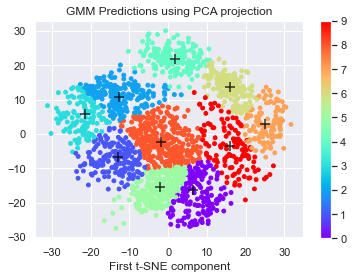

In [457]:
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture

# Instantiate the projection modules
pca = PCA(2)
tsne=TSNE(n_components=2)

# Make projections on the data
useTSNE=False
if useTSNE:
    method='t-SNE'
    projected=tsne.fit_transform(digits.data)
else:
    method='PCA'
    projected = pca.fit_transform(digits.data)
    
# Fit the model
gmm = GaussianMixture(n_components=10).fit(projected)

# Predict clusters
labels = gmm.predict(projected)
centers = gmm.means_

# Plot the data
plt.scatter(projected[:, 0], projected[:, 1], c=labels, s=15, cmap='rainbow')
plt.colorbar()
plt.scatter(centers[:, 0], centers[:, 1], c='.black', s=100, alpha=0.8, marker='+');
plt.title('GMM Predictions using %s projection' % (method))
plt.xlabel('First t-SNE component')


print(confusion_matrix(digits.target, gmm.predict(projected)))

#plt.figure()
#sns.heatmap(confusion_matrix(digits.target, gmm.predict(projected)))

GMM is probabilistic model supporting also prediction probabilities. In other words, it can tell what is the probability of a certain sample in belonging to a certain cluster. For example let's calculated all probabilities and then visualize the probabilities of sample 19 in belonging to certain clusters.

Due to stochastic nature of t-SNE and GMM, the results may vary in each run of GMM or t-SNE.

<BarContainer object of 10 artists>

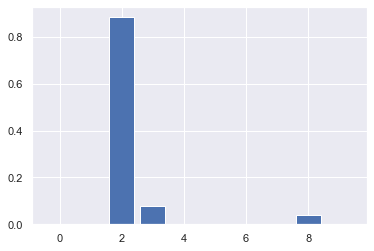

In [458]:
i=19
plt.bar(range(10), gmm.predict_proba(projected)[i])

# References <a id='references'></a>

1.  I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. Ii: Real Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 22, no. 1, pp. 21–31, 1973, doi: 10.2307/2346300.
2.  Q. Guo, W. Wu, D. L. Massart, C. Boucon, and S. de Jong, “Feature selection in principal component analysis of analytical data,” Chemometrics and Intelligent Laboratory Systems, vol. 61, no. 1, pp. 123–132, Feb. 2002, doi: 10.1016/S0169-7439(01)00203-9.
3.  I. T. Jolliffe, “Discarding Variables in a Principal Component Analysis. I: Artificial Data,” Journal of the Royal Statistical Society: Series C (Applied Statistics), vol. 21, no. 2, pp. 160–173, 1972, doi: 10.2307/2346488.
4. C. M. Bishop, “Pattern recognition and machine learning,” CERN Document Server, 2006. https://cds.cern.ch/record/998831 (accessed Oct. 02, 2020).
